# Importando dados

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")

# Visualize data

### Test

In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
test.shape

(6493, 9)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

### Train

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train.shape

(10886, 12)

In [10]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
missing_values = train.isnull().sum()
missing_values[0:12]

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [13]:
train.registered.mean()

155.5521771082124

### Submission

In [14]:
submission.head

<bound method NDFrame.head of                  datetime  count
0     2011-01-20 00:00:00      0
1     2011-01-20 01:00:00      0
2     2011-01-20 02:00:00      0
3     2011-01-20 03:00:00      0
4     2011-01-20 04:00:00      0
...                   ...    ...
6488  2012-12-31 19:00:00      0
6489  2012-12-31 20:00:00      0
6490  2012-12-31 21:00:00      0
6491  2012-12-31 22:00:00      0
6492  2012-12-31 23:00:00      0

[6493 rows x 2 columns]>

# Data Cleaning

### Split datetime

In [15]:
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['date'] = pd.to_datetime(train['datetime']).dt.date
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['dayf_of_week'] = pd.to_datetime(train['datetime']).dt.day_of_week
train['day_name'] = pd.to_datetime(train['datetime']).dt.day_name()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,year,dayf_of_week,day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011-01-01,2011,5,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011-01-01,2011,5,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011-01-01,2011,5,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011-01-01,2011,5,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011-01-01,2011,5,Saturday


In [16]:
test['hour'] = pd.to_datetime(test['datetime']).dt.hour
test['date'] = pd.to_datetime(test['datetime']).dt.date
test['year'] = pd.to_datetime(test['datetime']).dt.year
test['dayf_of_week'] = pd.to_datetime(test['datetime']).dt.day_of_week
test['day_name'] = pd.to_datetime(test['datetime']).dt.day_name()
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,date,year,dayf_of_week,day_name
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011-01-20,2011,3,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011-01-20,2011,3,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,2011-01-20,2011,3,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011-01-20,2011,3,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,2011-01-20,2011,3,Thursday


# Data Analisys

Hitmap

/tmp/ipykernel_1453/3603249399.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.drop("day_name", axis=1).corr(), vmax=0.6, square=True, annot=True)


<AxesSubplot: >

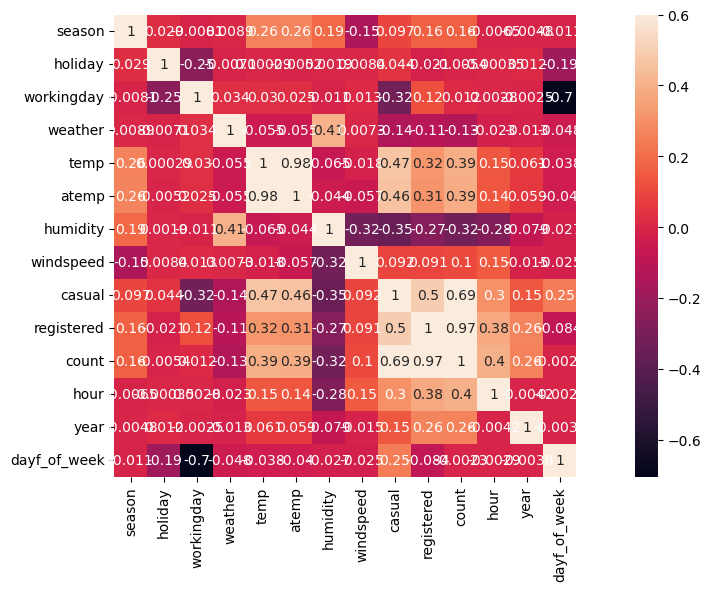

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop("day_name", axis=1).corr(), vmax=0.6, square=True, annot=True)

Hists

array([[<AxesSubplot: title={'center': 'season'}>,
        <AxesSubplot: title={'center': 'holiday'}>,
        <AxesSubplot: title={'center': 'workingday'}>,
        <AxesSubplot: title={'center': 'weather'}>],
       [<AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'atemp'}>,
        <AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'windspeed'}>],
       [<AxesSubplot: title={'center': 'casual'}>,
        <AxesSubplot: title={'center': 'registered'}>,
        <AxesSubplot: title={'center': 'count'}>,
        <AxesSubplot: title={'center': 'hour'}>],
       [<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'dayf_of_week'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

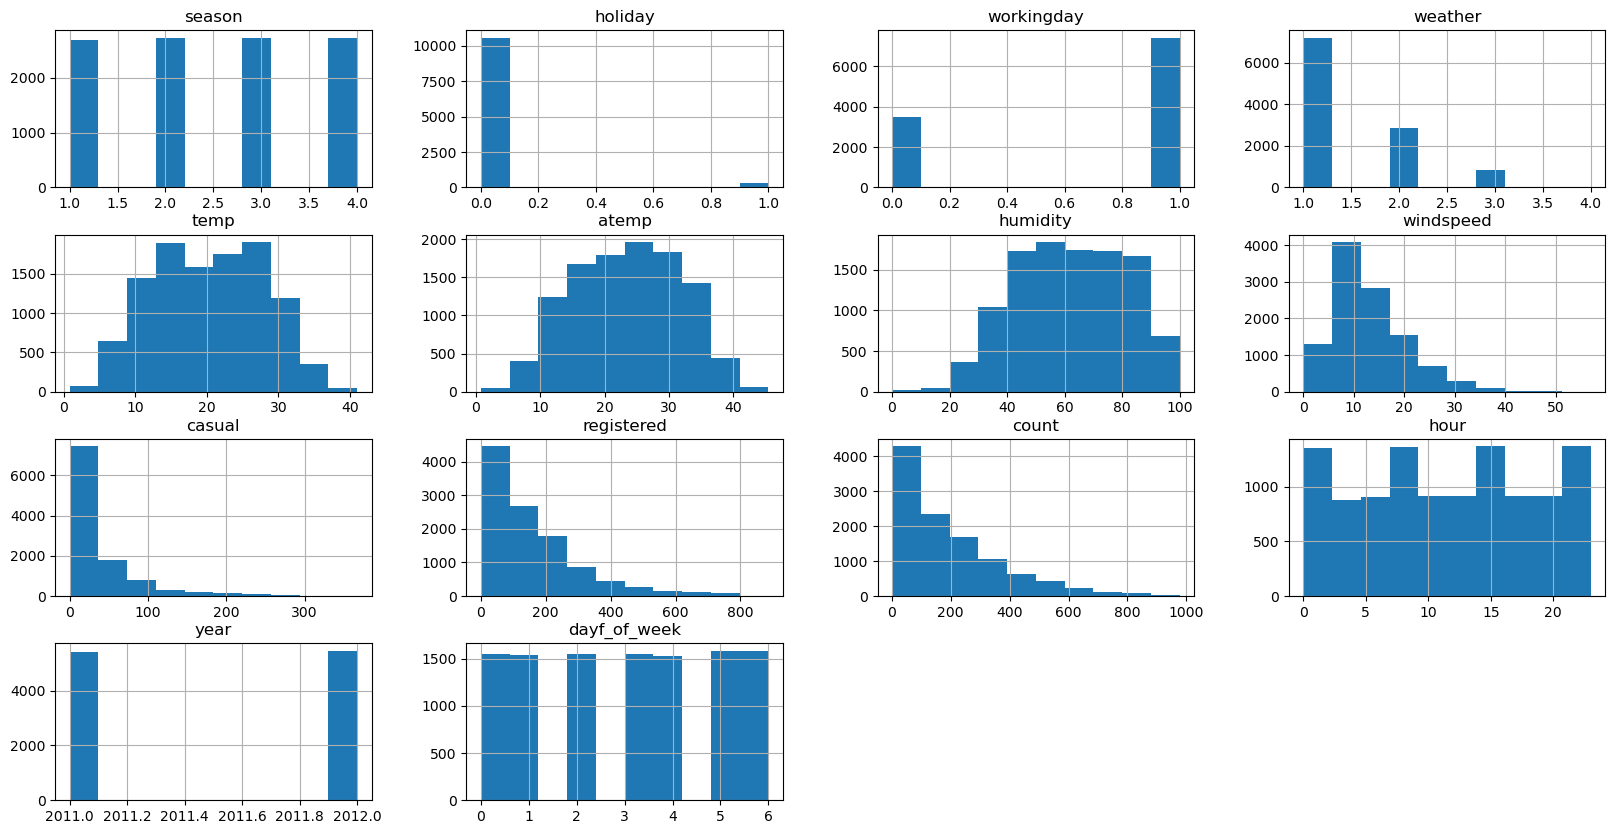

In [18]:
train.hist(figsize=(20, 10))

Boxplots

In [19]:
(train['weather'].value_counts()/train['weather'].count())*100 #Frequency of any value
#Good days increase all count

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

<AxesSubplot: xlabel='hour', ylabel='count'>

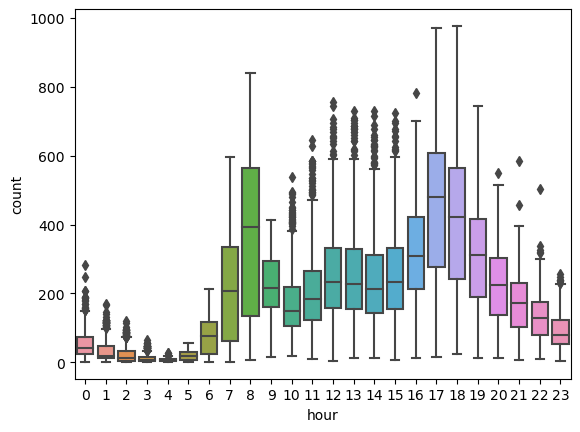

In [20]:
sns.boxplot(data=train, x="hour", y="count", width=0.8)
#A specific hour change the data

<AxesSubplot: xlabel='hour', ylabel='registered'>

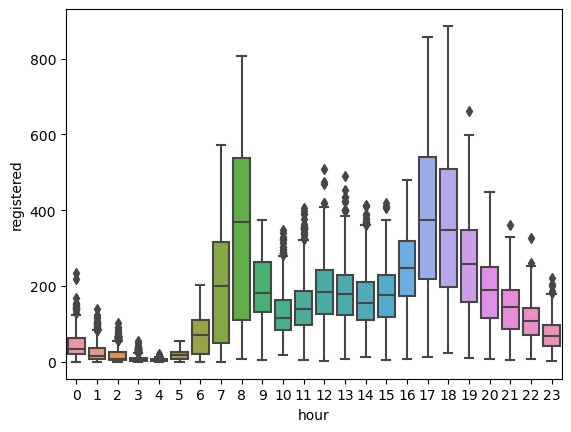

In [21]:
sns.boxplot(data=train, x="hour", y="registered", width=0.8)
#Registered is a solid grou, they have a routine

<AxesSubplot: xlabel='hour', ylabel='casual'>

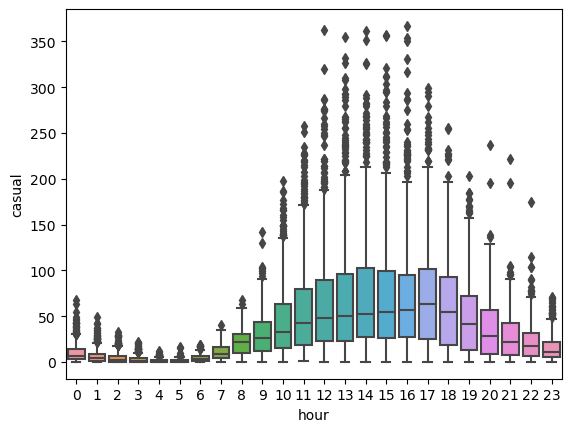

In [22]:
sns.boxplot(data=train, x="hour", y="casual", width=0.8)
#Casual bikers increase during the day

<AxesSubplot: xlabel='weather', ylabel='count'>

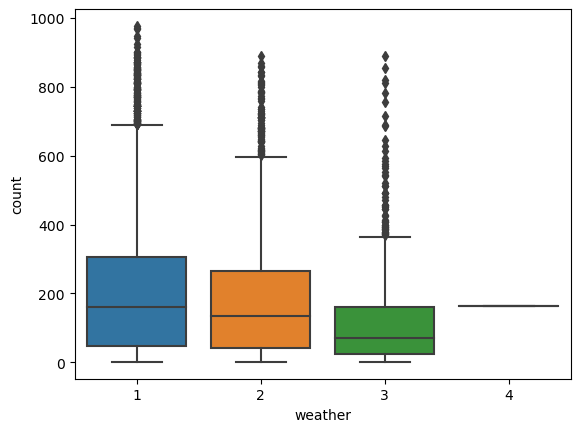

In [23]:
sns.boxplot(data=train, x="weather", y="count")
#1 - Good day
#2 - Normal day
#3 - I'm not shure day
#4 - Not today

          humidity      atemp       temp  windspeed     casual  registered  \
weather                                                                      
1        56.716769  23.994126  20.557122  12.892542  40.308676  164.928115   
2        69.100565  23.072414  19.614608  12.179905  30.785462  148.170078   
3        81.341094  22.753091  19.546356  14.071248  17.442375  101.403958   
4        86.000000  11.365000   8.200000   6.003200   6.000000  158.000000   

              count  
weather              
1        205.236791  
2        178.955540  
3        118.846333  
4        164.000000  
         humidity       atemp       temp   windspeed  casual  registered  \
weather                                                                    
1          407907  172565.755  147846.82  92723.1626  289900     1186163   
2          195831   65387.220   55587.80  34517.8506   87246      419914   
3           69872   19544.905   16790.32  12087.2020   14983       87106   
4              86  

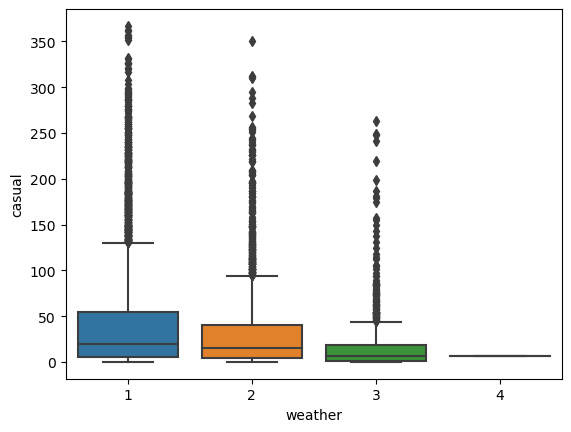

In [24]:
sns.boxplot(data=train, x="weather", y="casual")
#Change because have more registered? 
df = pd.DataFrame(train[['weather', 'humidity', 'atemp', 'temp', 'windspeed', 'casual', 'registered', 'count']])
print(df.groupby(['weather']).mean())
print(df.groupby(['weather']).sum())
print(df.groupby(['weather']).count())
#Lower windspeed associated with heavy rain do not make sense
#error in huge values of windspeed?
#error in small values of windspeed?


<AxesSubplot: xlabel='weather', ylabel='registered'>

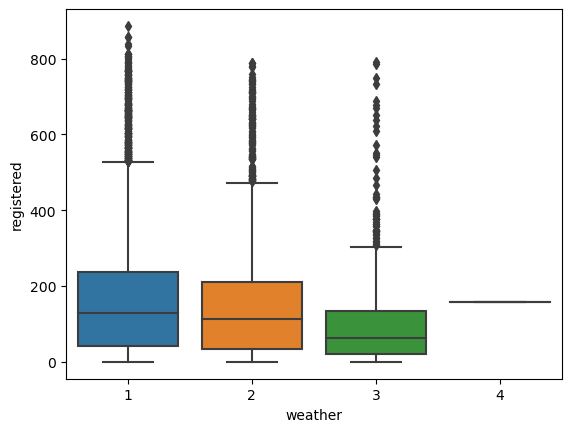

In [25]:
sns.boxplot(data=train, x="weather", y="registered")
#Same relationship

<AxesSubplot: xlabel='year', ylabel='count'>

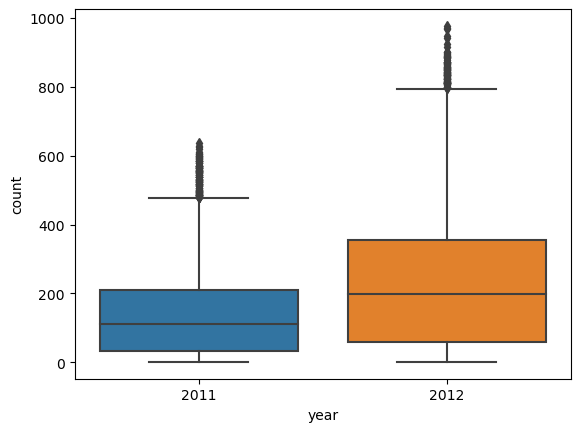

In [26]:
sns.boxplot(data=train, x="year", y="count")
#Increase in one year

Decision tree

In [30]:
feature_cols = ['hour']
x = train[feature_cols]
y = train.registered
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(y, x)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf)

Error in callback <function flush_figures at 0x7f486b9c63b0> (for post_execute):


KeyboardInterrupt: 